In [1]:
# basic level analysis for the email using site https://query.data.world/s/o3a54tz46d55ywn32d6wcgtgomlfnx
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
emails = pd.read_csv("https://query.data.world/s/o3a54tz46d55ywn32d6wcgtgomlfnx")
emails.head()


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,100000,<3013862.1075854174317.JavaMail.evans@thyme>,1999-12-20 13:43:00,frozenset({'daren.farmer@enron.com'}),frozenset({'julie.meyers@enron.com'}),Evergreen deals,Daren J Farmer,Julie Meyers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,100001,<20344708.1075854174339.JavaMail.evans@thyme>,1999-12-20 12:10:00,frozenset({'daren.farmer@enron.com'}),frozenset({'brenda.herod@enron.com'}),Re: purge of old Contract_Event_Status,Daren J Farmer,Brenda F Herod,"Mary M Smith, Pat Clynes",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,100002,<13857515.1075854174362.JavaMail.evans@thyme>,1999-12-20 11:37:00,frozenset({'daren.farmer@enron.com'}),frozenset({'kenneth.seaman@enron.com'}),January Production Estimate,Daren J Farmer,Kenneth Seaman,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,100003,<1946403.1075854174384.JavaMail.evans@thyme>,1999-12-10 16:36:00,frozenset({'daren.farmer@enron.com'}),frozenset({'kimberly.vaughn@enron.com'}),HL&P for 11/99,Daren J Farmer,Kimberly Vaughn,Anita Luong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100004,<31181882.1075854174405.JavaMail.evans@thyme>,1999-12-10 16:33:00,frozenset({'daren.farmer@enron.com'}),frozenset({'susan.trevino@enron.com'}),Re: Meter 5892 - UA4 1996 and 1997 Logistics I...,Daren J Farmer,Susan D Trevino,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Details of the first email

In [3]:
emails.loc[0]

Unnamed: 0                                                   100000
Message-ID             <3013862.1075854174317.JavaMail.evans@thyme>
Date                                            1999-12-20 13:43:00
From                          frozenset({'daren.farmer@enron.com'})
To                            frozenset({'julie.meyers@enron.com'})
Subject                                             Evergreen deals
X-From                                               Daren J Farmer
X-To                                                   Julie Meyers
X-cc                                                            NaN
X-bcc                                                           NaN
X-Folder            \Darren_Farmer_Dec2000\Notes Folders\'sent mail
X-Origin                                                   Farmer-D
X-FileName                                              dfarmer.nsf
content           Julie, I need to know if the following deals h...
user                                            

Extract few important columns/features

In [4]:
df = emails[['Message-ID','Date','From','To','Subject','X-From','X-To','user']]
df.head()

,Message-ID,Date,From,To,Subject,X-From,X-To,user
0,<3013862.1075854174317.JavaMail.evans@thyme>,1999-12-20 13:43:00,frozenset({'daren.farmer@enron.com'}),frozenset({'julie.meyers@enron.com'}),Evergreen deals,Daren J Farmer,Julie Meyers,farmer-d
1,<20344708.1075854174339.JavaMail.evans@thyme>,1999-12-20 12:10:00,frozenset({'daren.farmer@enron.com'}),frozenset({'brenda.herod@enron.com'}),Re: purge of old Contract_Event_Status,Daren J Farmer,Brenda F Herod,farmer-d
2,<13857515.1075854174362.JavaMail.evans@thyme>,1999-12-20 11:37:00,frozenset({'daren.farmer@enron.com'}),frozenset({'kenneth.seaman@enron.com'}),January Production Estimate,Daren J Farmer,Kenneth Seaman,farmer-d
3,<1946403.1075854174384.JavaMail.evans@thyme>,1999-12-10 16:36:00,frozenset({'daren.farmer@enron.com'}),frozenset({'kimberly.vaughn@enron.com'}),HL&P for 11/99,Daren J Farmer,Kimberly Vaughn,farmer-d
4,<31181882.1075854174405.JavaMail.evans@thyme>,1999-12-10 16:33:00,frozenset({'daren.farmer@enron.com'}),frozenset({'susan.trevino@enron.com'}),Re: Meter 5892 - UA4 1996 and 1997 Logistics I...,Daren J Farmer,Susan D Trevino,farmer-d


Check for null values

In [5]:
df.isnull().sum()

Message-ID       0
Date             0
From             0
To            3039
Subject       1924
X-From           3
X-To          1113
user             0
dtype: int64

In [6]:
df['To'].unique() 

array(["frozenset({'julie.meyers@enron.com'})",
       "frozenset({'brenda.herod@enron.com'})",
       "frozenset({'kenneth.seaman@enron.com'})", ...,
       "frozenset({'ludkam@aol.com', 'vincek@palm.net'})",
       "frozenset({'vincek@palm.net'})",
       "frozenset({'giuseppe.paleologo@enron.com'})"], dtype=object)

In [7]:
df['Date'].unique

<bound method Series.unique of 0        1999-12-20 13:43:00
1        1999-12-20 12:10:00
2        1999-12-20 11:37:00
3        1999-12-10 16:36:00
4        1999-12-10 16:33:00
                ...         
99995    2000-09-15 16:07:00
99996    2000-09-15 16:01:00
99997    2000-09-15 14:18:00
99998    2000-09-15 14:13:00
99999    2000-09-15 11:16:00
Name: Date, Length: 100000, dtype: object>

In [8]:
df['From'].unique()

array(["frozenset({'daren.farmer@enron.com'})",
       "frozenset({'arsystem@mailman.enron.com'})",
       "frozenset({'megan.parker@enron.com'})", ...,
       "frozenset({'amy.heffernan@enron.com'})",
       "frozenset({'ecthou_gt2@enron.com'})",
       "frozenset({'vince.kaminski@enron.com'})"], dtype=object)

In [9]:
df['user'].unique()

array(['farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gang-l', 'gay-r',
       'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d',
       'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m',
       'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s',
       'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k',
       'hyvl-d', 'jones-t', 'kaminski-v'], dtype=object)

In [10]:
df['user'].describe() #Description of users

count      100000
unique         27
top       jones-t
freq        19950
Name: user, dtype: object

In [16]:
df['Subject'].value_counts() #Number of emails/rows per value of the subject

RE:                                               686
Re:                                               665
Schedule Crawler: HourAhead Failure <CODESITE>    234
FW:                                               162
Hey                                               162
                                                 ... 
FW: another one - sale of Energoville               1
Kathleen Ann Storage Field                          1
Re: Flight                                          1
KeyEx stuff w/ Team                                 1
RE: Astros game                                     1
Name: Subject, Length: 35707, dtype: int64

In [23]:
df['user'].value_counts() #Number of eamils/rows per different users

jones-t           19950
farmer-d          12454
germany-c         12436
guzman-m           6054
haedicke-m         5246
fossum-d           4796
giron-d            4220
hain-m             3820
hernandez-j        3265
hyvl-d             3210
griffith-j         2973
hayslett-r         2554
horton-s           2470
grigsby-m          2237
hyatt-k            1794
hodge-j            1661
heard-m            1623
geaccone-t         1592
fischer-m          1498
gay-r              1415
kaminski-v         1105
forney-j            729
hendrickson-s       719
gang-l              590
gilbertsmith-d      578
harris-s            548
holst-k             463
Name: user, dtype: int64

Count Plot graph for users

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'users_count')

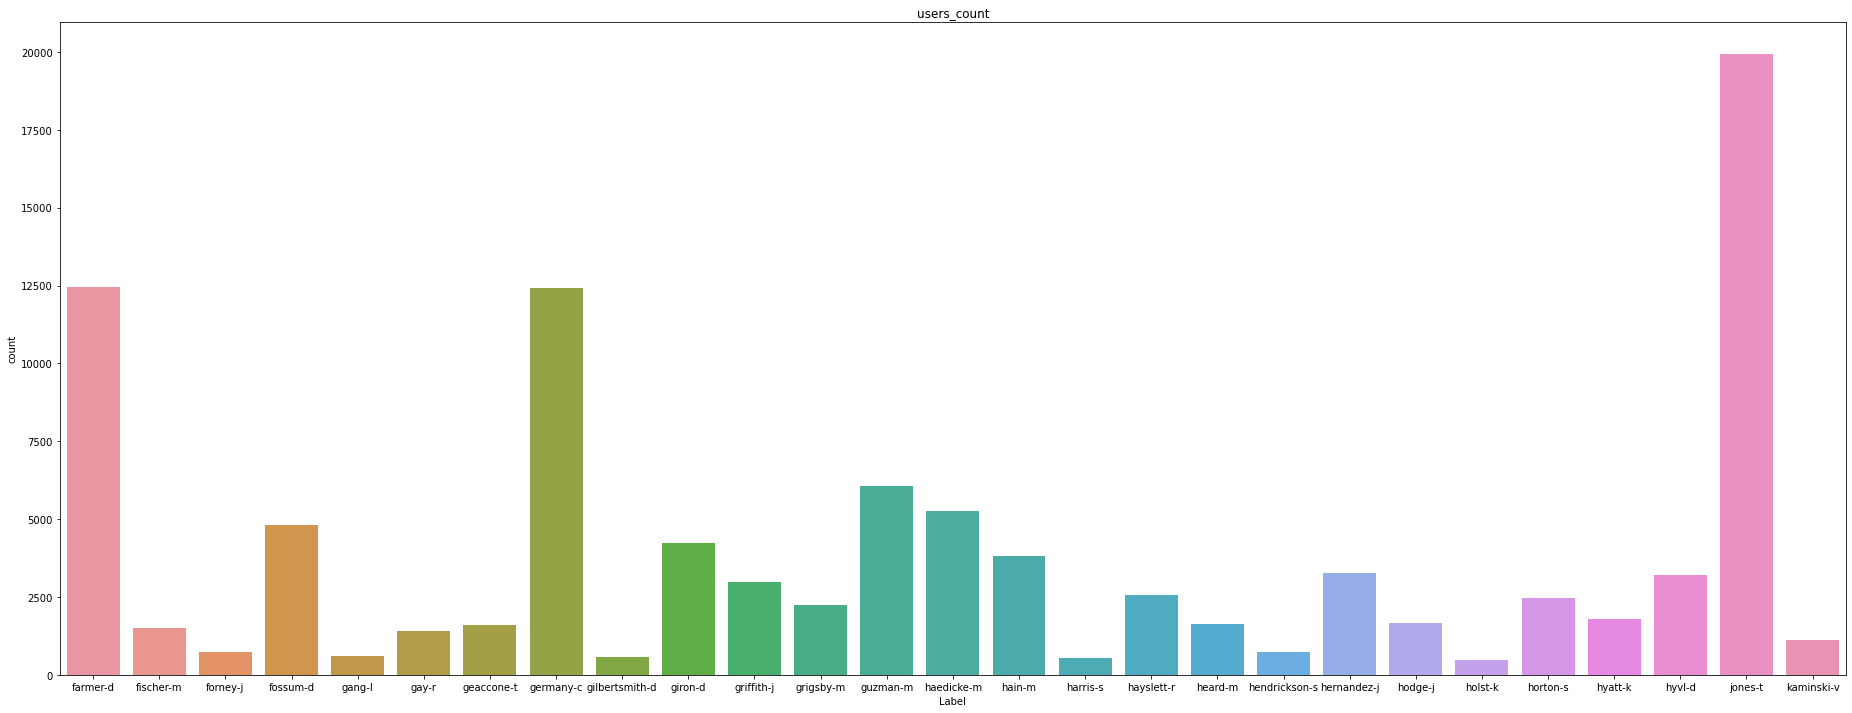

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(32,12))
sns.countplot(df.user)
plt.xlabel('Label')
plt.title('users_count')